In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

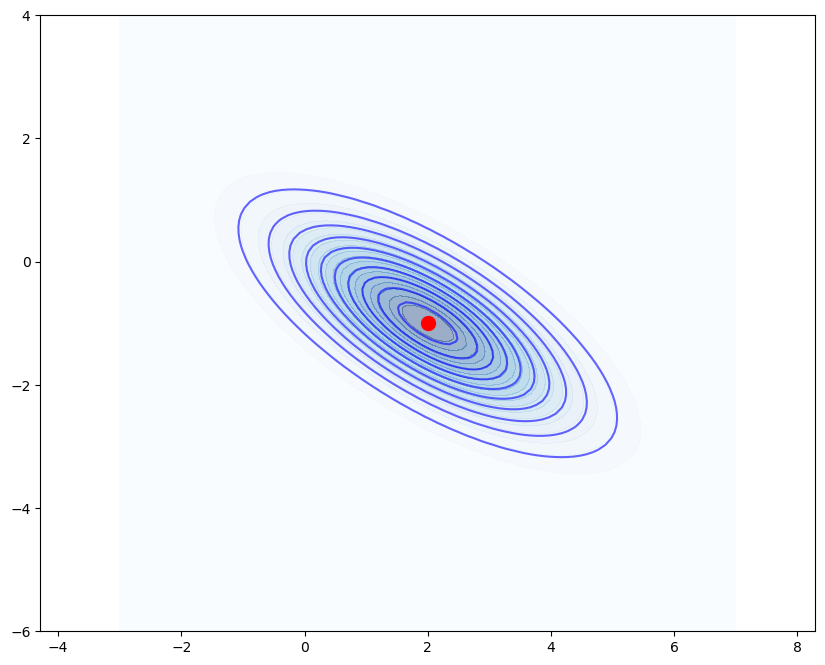

In [2]:
# Define the parameters for the multivariate normal distribution
mean = np.array([2, -1])
cov = np.array([[2, -1], [-1, 1]])

# Create a grid of points for the contour plot
x = np.linspace(-3, 7, 100)
y = np.linspace(-6, 4, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Create the multivariate normal distribution and calculate PDF
rv = multivariate_normal(mean, cov)
Z = rv.pdf(pos)

# Create the contour plot
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=10, colors='blue', alpha=0.6)
plt.contourf(X, Y, Z, levels=20, cmap='Blues', alpha=0.4)
plt.plot(mean[0], mean[1], 'ro', markersize=10)
plt.axis('equal')
plt.show()

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Create a random 20x1 mean vector
mean_vector = np.random.randn(20) * 3

# Create a random positive definite 20x20 covariance matrix
A = np.random.randn(20, 20)
covariance_matrix = A @ A.T + 0.1 * np.eye(20)

LaTeX representation of the covariance matrix structure:
(Showing first 6x6 submatrix as example)


<IPython.core.display.Latex object>


Numerical values for the 6x6 submatrix:
           j=0        j=1        j=2       j=3        j=4        j=5
i=0  19.319735   1.772805  -0.982139  3.111781  -4.079357   1.464243
i=1   1.772805  12.916275  -3.038033 -2.110737   1.086399  -0.175801
i=2  -0.982139  -3.038033  23.617751 -1.296082   5.518902   9.782085
i=3   3.111781  -2.110737  -1.296082  9.178567  -0.306136  -2.100921
i=4  -4.079357   1.086399   5.518902 -0.306136  20.010608   3.921327
i=5   1.464243  -0.175801   9.782085 -2.100921   3.921327  22.097227

Pattern explanation:
- Diagonal elements (i=j): 1.0
- Off-diagonal elements: 0.8^|i-j|
- Examples:
  Distance 1: 0.8^1 = 0.800000
  Distance 2: 0.8^2 = 0.640000
  Distance 3: 0.8^3 = 0.512000
  Distance 4: 0.8^4 = 0.409600
  Distance 5: 0.8^5 = 0.327680


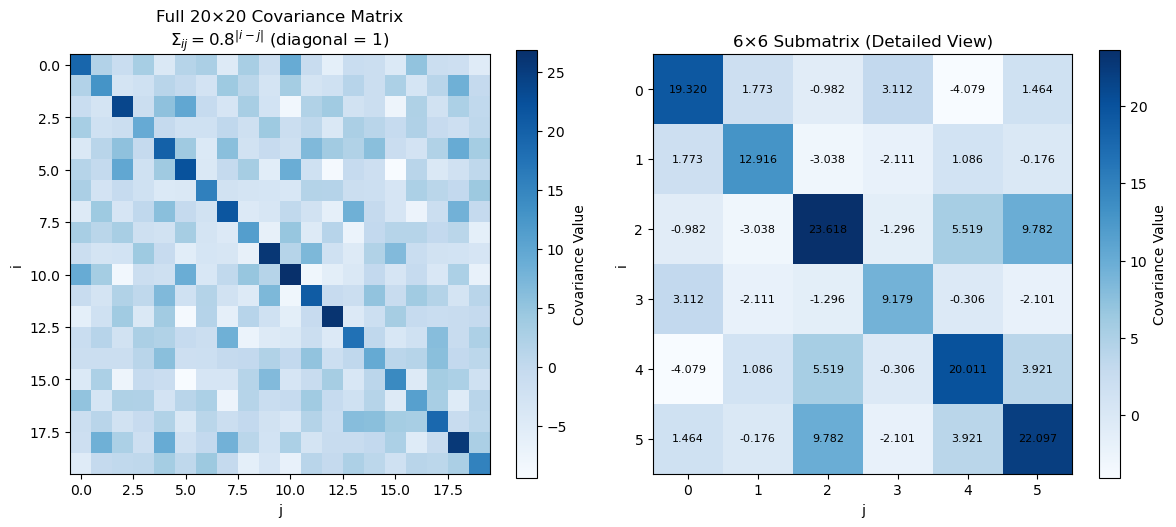

In [4]:
# Create LaTeX representation of the covariance matrix
from IPython.display import display, Markdown, Latex
import pandas as pd

# Create a smaller version for display (first 6x6 submatrix)
display_size = 6
cov_display = covariance_matrix[:display_size, :display_size]

print("LaTeX representation of the covariance matrix structure:")
print("(Showing first 6x6 submatrix as example)")

# Create LaTeX string
latex_str = r"\begin{bmatrix}"
for i in range(display_size):
    row_str = ""
    for j in range(display_size):
        if i == j:
            row_str += "1"
        else:
            row_str += f"0.8^{{{abs(i-j)}}}"
        if j < display_size - 1:
            row_str += " & "
    latex_str += row_str
    if i < display_size - 1:
        latex_str += r" \\"
latex_str += r"\end{bmatrix}"

# Display the LaTeX
display(Latex(r"$$\Sigma = " + latex_str + "$$"))

# Also show the numerical values
print(f"\nNumerical values for the 6x6 submatrix:")
df_display = pd.DataFrame(cov_display, 
                         index=[f'i={i}' for i in range(display_size)],
                         columns=[f'j={j}' for j in range(display_size)])
print(df_display.round(6))

# Show the pattern more clearly
print(f"\nPattern explanation:")
print(f"- Diagonal elements (i=j): 1.0")
print(f"- Off-diagonal elements: 0.8^|i-j|")
print(f"- Examples:")
for dist in range(1, 6):
    print(f"  Distance {dist}: 0.8^{dist} = {0.8**dist:.6f}")

# Visualize the covariance matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(covariance_matrix, cmap='Blues', aspect='equal')
plt.colorbar(label='Covariance Value')
plt.title('Full 20×20 Covariance Matrix\n$\\Sigma_{ij} = 0.8^{|i-j|}$ (diagonal = 1)', fontsize=12)
plt.xlabel('j')
plt.ylabel('i')

plt.subplot(1, 2, 2)
plt.imshow(cov_display, cmap='Blues', aspect='equal')
plt.colorbar(label='Covariance Value')
plt.title('6×6 Submatrix (Detailed View)', fontsize=12)
plt.xlabel('j')
plt.ylabel('i')
for i in range(display_size):
    for j in range(display_size):
        plt.text(j, i, f'{cov_display[i,j]:.3f}', 
                ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

C:\Users\tmlouw\AppData\Local\Temp\ipykernel_35804\184705468.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Position', y='Value', inner='box', palette='viridis')


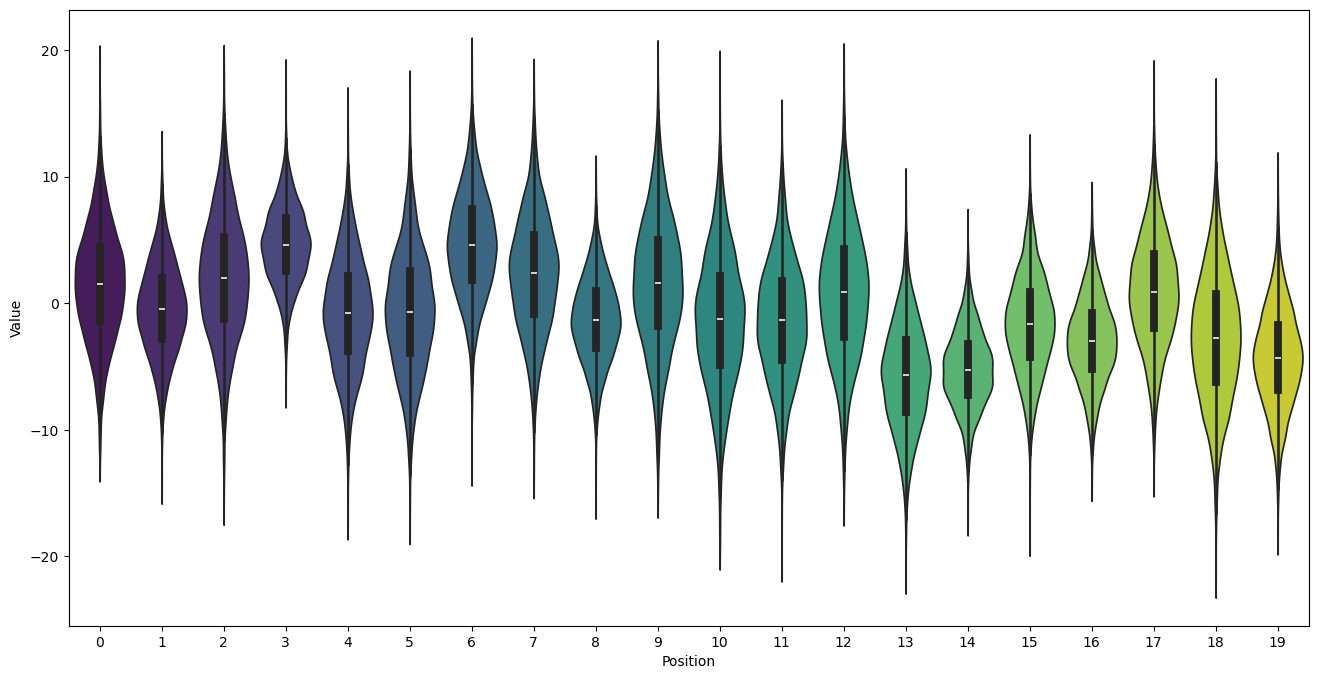

In [5]:
# Create violin plot showing normal distributions at each position
import seaborn as sns
import pandas as pd

# Generate samples for each position
n_samples = 5000
violin_data = []
positions = []

for i in range(20):
    mean_i = mean_vector[i]
    variance_i = covariance_matrix[i, i]
    std_i = np.sqrt(variance_i)
    samples = np.random.normal(mean_i, std_i, n_samples)
    violin_data.extend(samples)
    positions.extend([i] * n_samples)

# Create violin plot
plt.figure(figsize=(16, 8))
df = pd.DataFrame({'Position': positions, 'Value': violin_data})
sns.violinplot(data=df, x='Position', y='Value', inner='box', palette='viridis')
plt.show()

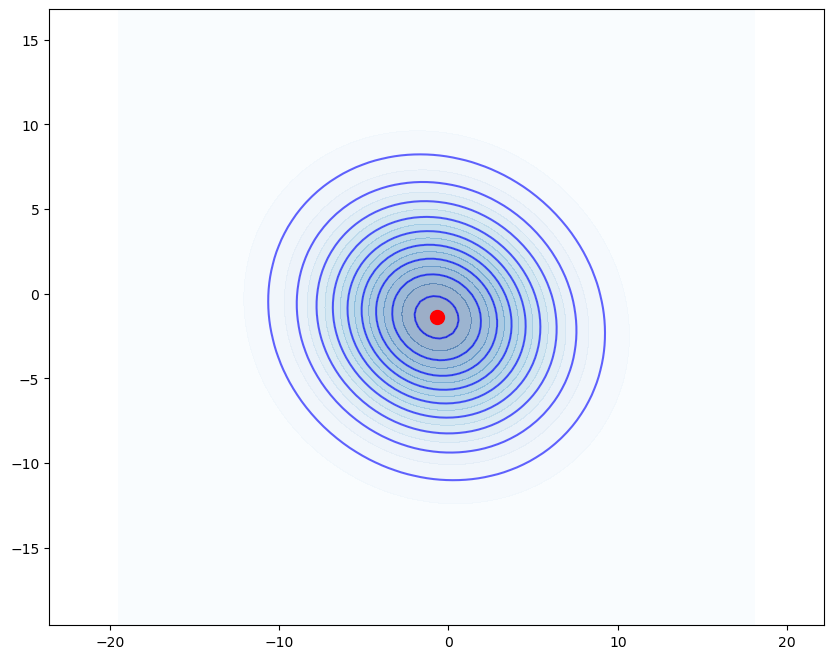

In [6]:
# Extract 2D multivariate normal distribution parameters for i=5, j=11
i, j = 5, 11
mean_2d = np.array([mean_vector[i], mean_vector[j]])
cov_2d = np.array([[covariance_matrix[i, i], covariance_matrix[i, j]],
                   [covariance_matrix[j, i], covariance_matrix[j, j]]])

# Create grid and calculate PDF
std_i = np.sqrt(cov_2d[0, 0])
std_j = np.sqrt(cov_2d[1, 1])
x_range = mean_2d[0] + np.array([-4*std_i, 4*std_i])
y_range = mean_2d[1] + np.array([-4*std_j, 4*std_j])
x = np.linspace(x_range[0], x_range[1], 100)
y = np.linspace(y_range[0], y_range[1], 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
rv_2d = multivariate_normal(mean_2d, cov_2d)
Z = rv_2d.pdf(pos)

# Create contour plot
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=10, colors='blue', alpha=0.6)
plt.contourf(X, Y, Z, levels=20, cmap='Blues', alpha=0.4)
plt.plot(mean_2d[0], mean_2d[1], 'ro', markersize=10)
plt.axis('equal')
plt.show()

In [7]:
# Create new structured mean vector and covariance matrix
mean_vector_new = np.zeros(20)
covariance_matrix_new = np.zeros((20, 20))

for i in range(20):
    for j in range(20):
        if i == j:
            covariance_matrix_new[i, j] = 1.0
        else:
            covariance_matrix_new[i, j] = 0.8**abs(i-j)

<IPython.core.display.Latex object>

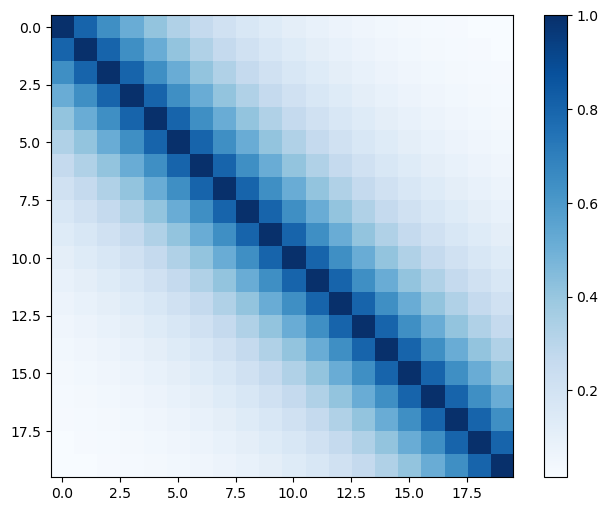

In [8]:
# Create LaTeX representation of the covariance matrix
from IPython.display import display, Latex

# Create LaTeX string with numerical values rounded to 2 decimal places
display_size = 6
latex_str = r"\begin{bmatrix}"
for i in range(display_size):
    row_str = ""
    for j in range(display_size):
        if i == j:
            row_str += "1.00"
        else:
            value = 0.8**abs(i-j)
            row_str += f"{value:.2f}"
        if j < display_size - 1:
            row_str += " & "
    latex_str += row_str
    if i < display_size - 1:
        latex_str += r" \\"
latex_str += r"\end{bmatrix}"

# Display the LaTeX
display(Latex(r"$$\Sigma = " + latex_str + "$$"))

# Visualize the full covariance matrix
plt.figure(figsize=(8, 6))
plt.imshow(covariance_matrix_new, cmap='Blues', aspect='equal')
plt.colorbar()
plt.show()

C:\Users\tmlouw\AppData\Local\Temp\ipykernel_35804\3436141964.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_new, x='Position', y='Value', inner='box', palette='viridis')


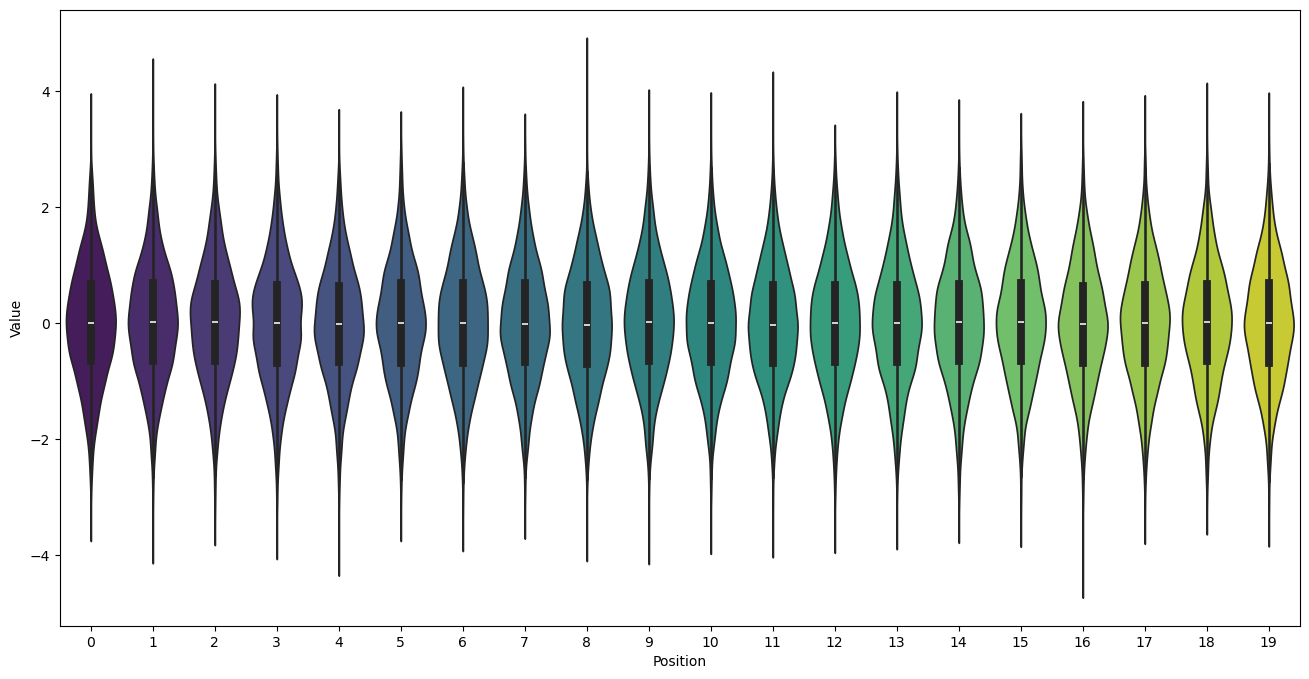

In [9]:
# Create violin plot for the new structured distribution
import seaborn as sns
import pandas as pd

# Generate samples for each position using the new matrices
n_samples = 5000
violin_data_new = []
positions_new = []

for i in range(20):
    samples = np.random.normal(0, 1, n_samples)
    violin_data_new.extend(samples)
    positions_new.extend([i] * n_samples)

# Create violin plot
plt.figure(figsize=(16, 8))
df_new = pd.DataFrame({'Position': positions_new, 'Value': violin_data_new})
sns.violinplot(data=df_new, x='Position', y='Value', inner='box', palette='viridis')
plt.show()

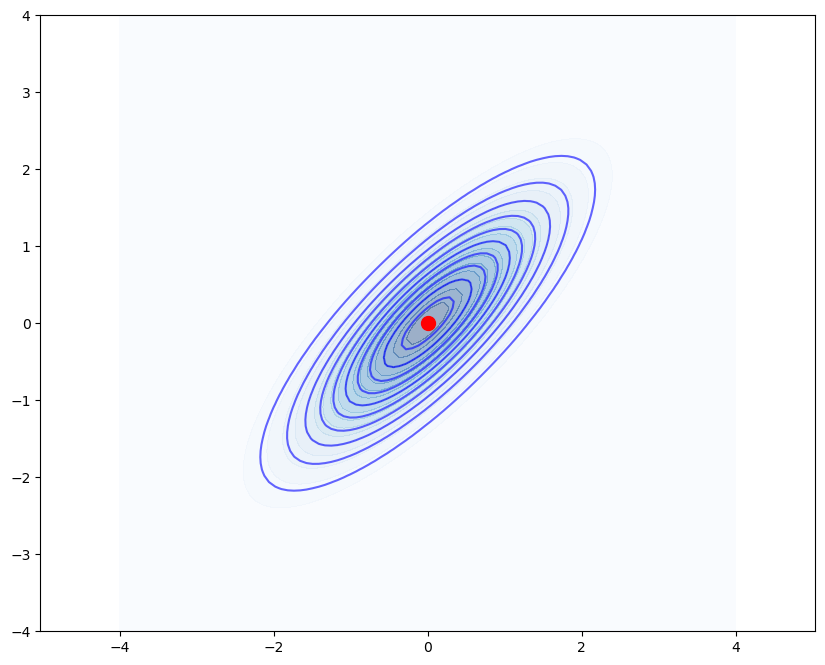

In [10]:
# Create contour plot for i=5, j=6 (New Structure)
i, j = 5, 6
mean_2d_new = np.array([0, 0])
cov_2d_new = np.array([[1, 0.8], [0.8, 1]])

# Create grid and calculate PDF
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
rv_2d_new = multivariate_normal(mean_2d_new, cov_2d_new)
Z = rv_2d_new.pdf(pos)

# Create contour plot
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=10, colors='blue', alpha=0.6)
plt.contourf(X, Y, Z, levels=20, cmap='Blues', alpha=0.4)
plt.plot(0, 0, 'ro', markersize=10)
plt.axis('equal')
plt.show()

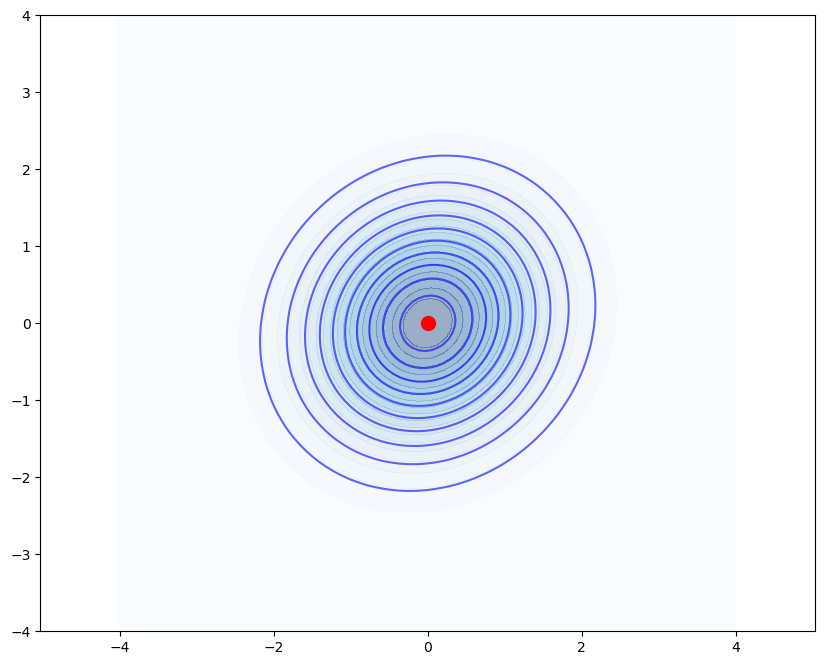

In [11]:
# Create contour plot for i=5, j=15 (New Structure)
i, j = 5, 15
mean_2d_new = np.array([0, 0])
cov_2d_new = np.array([[1, 0.8**10], [0.8**10, 1]])

# Create grid and calculate PDF
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
rv_2d_new = multivariate_normal(mean_2d_new, cov_2d_new)
Z = rv_2d_new.pdf(pos)

# Create contour plot
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=10, colors='blue', alpha=0.6)
plt.contourf(X, Y, Z, levels=20, cmap='Blues', alpha=0.4)
plt.plot(0, 0, 'ro', markersize=10)
plt.axis('equal')
plt.show()

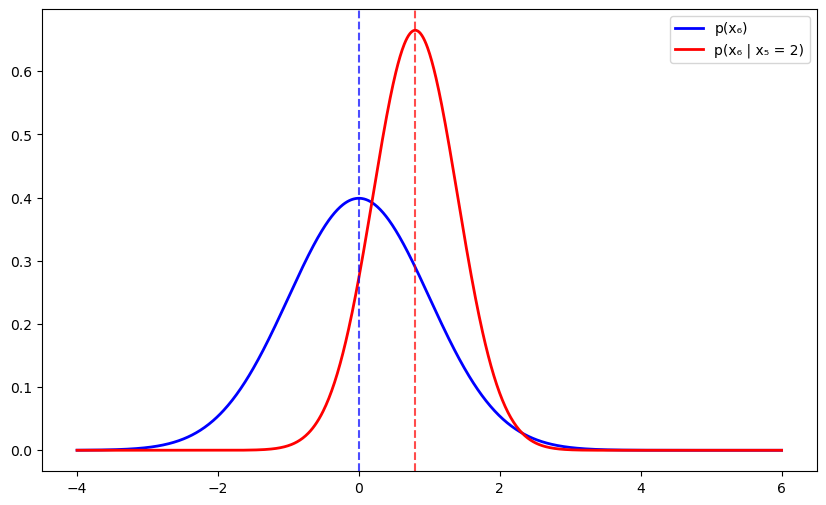

In [19]:
# Plot marginal p(x_6) and conditional p(x_6 | x_5 = 2) distributions
from scipy.stats import norm

# Extract parameters for x_5 and x_6 from the structured covariance matrix
i, j = 5, 6
mu_5 = mean_vector_new[i]  # 0
mu_6 = mean_vector_new[j]  # 0
sigma_5_sq = covariance_matrix_new[i, i]  # 1
sigma_6_sq = covariance_matrix_new[j, j]  # 1
sigma_56 = covariance_matrix_new[i, j]  # 0.8

# Marginal distribution p(x_6) ~ N(0, 1)
marginal_mean = mu_6
marginal_var = sigma_6_sq

# Conditional distribution p(x_6 | x_5 = 2)
# For multivariate normal: x_6 | x_5 ~ N(mu_6 + sigma_56/sigma_5_sq * (x_5 - mu_5), sigma_6_sq - sigma_56^2/sigma_5_sq)
x_5_given = 1.0
conditional_mean = mu_6 + (sigma_56 / sigma_5_sq) * (x_5_given - mu_5)
conditional_var = sigma_6_sq - (sigma_56**2 / sigma_5_sq)

# Create x values for plotting
x = np.linspace(-4, 6, 1000)

# Calculate probability densities
marginal_pdf = norm.pdf(x, marginal_mean, np.sqrt(marginal_var))
conditional_pdf = norm.pdf(x, conditional_mean, np.sqrt(conditional_var))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, marginal_pdf, 'b-', linewidth=2, label='p(x₆)')
plt.plot(x, conditional_pdf, 'r-', linewidth=2, label='p(x₆ | x₅ = 2)')
plt.axvline(x=marginal_mean, color='blue', linestyle='--', alpha=0.7)
plt.axvline(x=conditional_mean, color='red', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

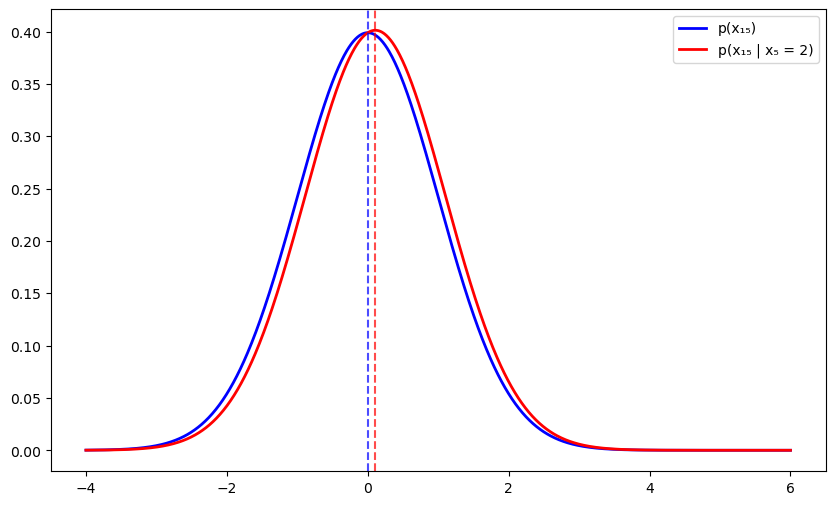

In [20]:
# Plot marginal p(x_15) and conditional p(x_15 | x_5 = 2) distributions
from scipy.stats import norm

# Extract parameters for x_5 and x_15 from the structured covariance matrix
i, j = 5, 15
mu_5 = mean_vector_new[i]  # 0
mu_15 = mean_vector_new[j]  # 0
sigma_5_sq = covariance_matrix_new[i, i]  # 1
sigma_15_sq = covariance_matrix_new[j, j]  # 1
sigma_5_15 = covariance_matrix_new[i, j]  # 0.8^10

# Marginal distribution p(x_15) ~ N(0, 1)
marginal_mean = mu_15
marginal_var = sigma_15_sq

# Conditional distribution p(x_15 | x_5 = 2)
x_5_given = 1.0
conditional_mean = mu_15 + (sigma_5_15 / sigma_5_sq) * (x_5_given - mu_5)
conditional_var = sigma_15_sq - (sigma_5_15**2 / sigma_5_sq)

# Create x values for plotting
x = np.linspace(-4, 6, 1000)

# Calculate probability densities
marginal_pdf = norm.pdf(x, marginal_mean, np.sqrt(marginal_var))
conditional_pdf = norm.pdf(x, conditional_mean, np.sqrt(conditional_var))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, marginal_pdf, 'b-', linewidth=2, label='p(x₁₅)')
plt.plot(x, conditional_pdf, 'r-', linewidth=2, label='p(x₁₅ | x₅ = 2)')
plt.axvline(x=marginal_mean, color='blue', linestyle='--', alpha=0.7)
plt.axvline(x=conditional_mean, color='red', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

C:\Users\tmlouw\AppData\Local\Temp\ipykernel_35804\3389305539.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_conditional, x='Position', y='Value', inner='box', palette='viridis')


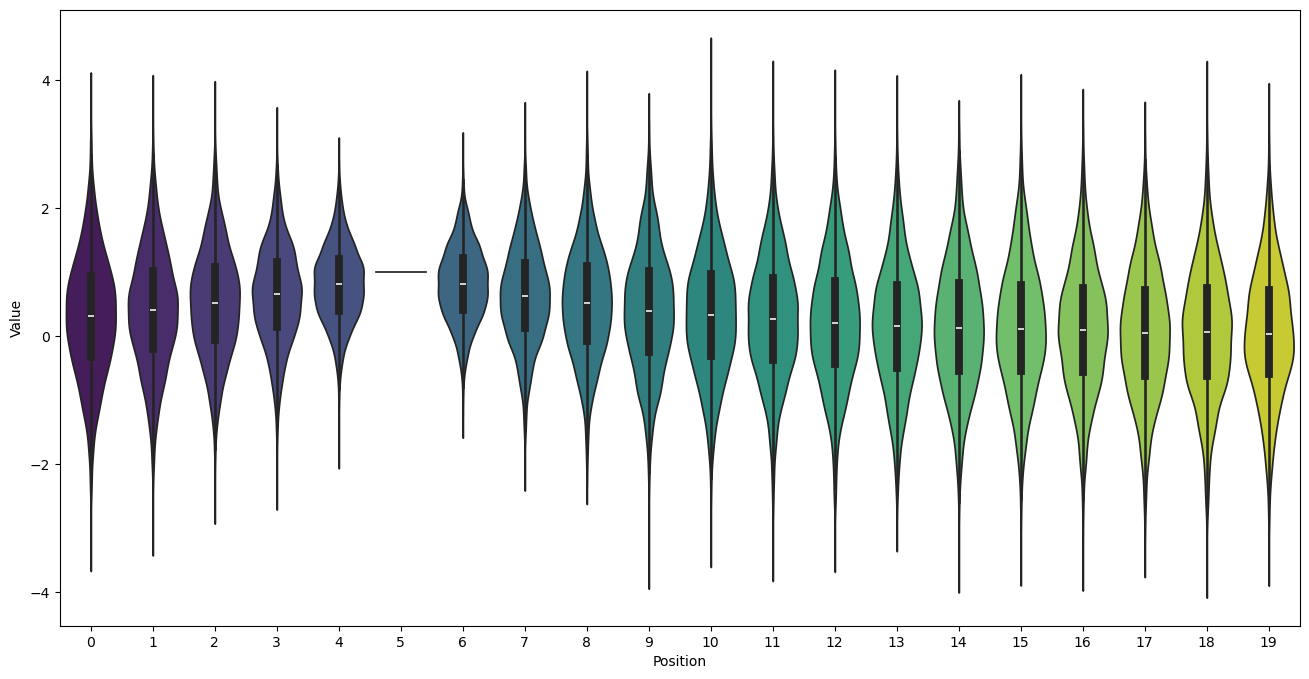

In [21]:
# Create violin plot showing conditional distributions p(x_i | x_5 = 1) for all variables
import seaborn as sns
import pandas as pd

# Generate samples for conditional distributions p(x_i | x_5 = 1)
n_samples = 5000
violin_data_conditional = []
positions_conditional = []
x_5_given = 1.0

for i in range(20):
    # Extract parameters for x_5 and x_i
    mu_5 = mean_vector_new[5]  # 0
    mu_i = mean_vector_new[i]  # 0
    sigma_5_sq = covariance_matrix_new[5, 5]  # 1
    sigma_i_sq = covariance_matrix_new[i, i]  # 1
    sigma_5i = covariance_matrix_new[5, i]  # 0.8^|5-i|
    
    # Calculate conditional distribution parameters: x_i | x_5 = 1
    conditional_mean = mu_i + (sigma_5i / sigma_5_sq) * (x_5_given - mu_5)
    conditional_var = sigma_i_sq - (sigma_5i**2 / sigma_5_sq)
    
    # Generate samples from conditional distribution
    samples = np.random.normal(conditional_mean, np.sqrt(conditional_var), n_samples)
    violin_data_conditional.extend(samples)
    positions_conditional.extend([i] * n_samples)

# Create violin plot
plt.figure(figsize=(16, 8))
df_conditional = pd.DataFrame({'Position': positions_conditional, 'Value': violin_data_conditional})
sns.violinplot(data=df_conditional, x='Position', y='Value', inner='box', palette='viridis')
plt.show()

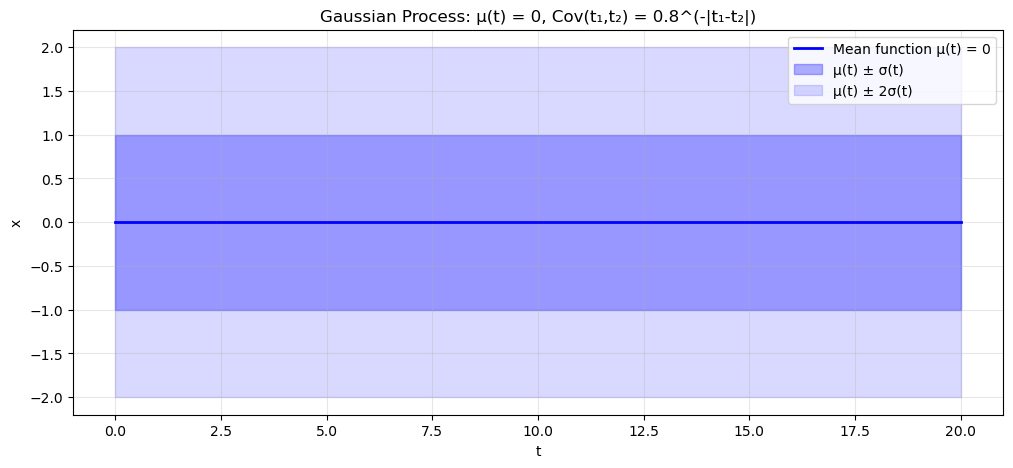

In [25]:
# Continuous Gaussian Process with exponential covariance function
# Mean function is zero, covariance is 0.8^(-|t1 - t2|)

# Define the time range
t = np.linspace(0, 20, 200)
n_points = len(t)

# Define the covariance function
def exponential_covariance(t1, t2, length_scale=1.0):
    return 0.8**(-np.abs(t1 - t2))

# Create the covariance matrix
K = np.zeros((n_points, n_points))
for i in range(n_points):
    for j in range(n_points):
        K[i, j] = exponential_covariance(t[i], t[j])

# Mean function (zero everywhere)
mean_function = np.zeros(n_points)

# Standard deviation at each point (square root of diagonal elements)
std_function = np.sqrt(np.diag(K))

# Create the plot
plt.figure(figsize=(12, 5))

# Plot mean function
plt.plot(t, mean_function, 'b-', linewidth=2, label='Mean function μ(t) = 0')

# Plot confidence bands (mean ± 1 standard deviation)
plt.fill_between(t, mean_function - std_function, mean_function + std_function, 
                 alpha=0.3, color='blue', label='μ(t) ± σ(t)')

# Plot additional confidence bands for reference
plt.fill_between(t, mean_function - 2*std_function, mean_function + 2*std_function, 
                 alpha=0.15, color='blue', label='μ(t) ± 2σ(t)')

plt.xlabel('t')
plt.ylabel('x')
plt.title('Gaussian Process: μ(t) = 0, Cov(t₁,t₂) = 0.8^(-|t₁-t₂|)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


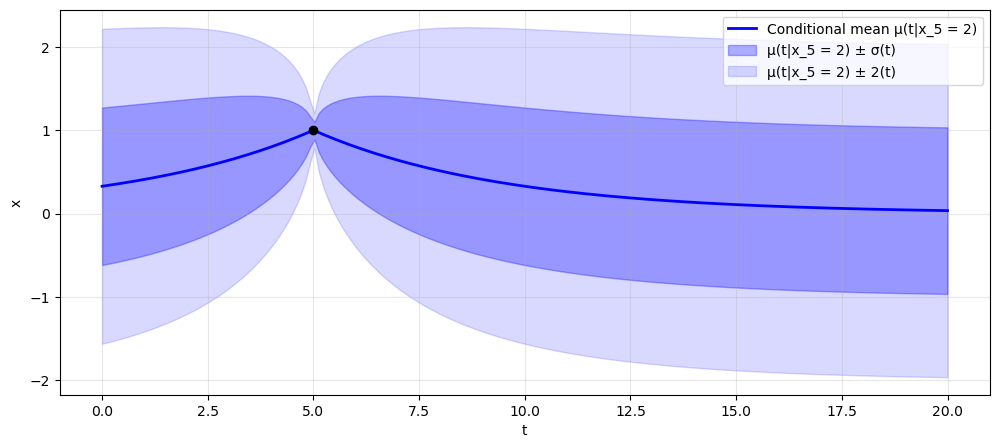

In [55]:
# Gaussian Process Conditioning using sklearn: Update after observing x(5) = 1
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
import numpy as np


t_train, x_train = np.array([[5]]), np.array([[1]])  # Observed data point x(5) = 1

kernel = Matern(length_scale=-1/np.log(0.8), length_scale_bounds=(1e-3, 1e2), nu = 0.5)
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(t_train, x_train)
gaussian_process.kernel_

t = np.linspace(0, 20, 200).reshape(-1, 1)  # New time points for prediction
mean_prediction, std_prediction = gaussian_process.predict(t, return_std=True)

# Create the plot
plt.figure(figsize=(12, 5))

# Plot mean function
plt.plot(t, mean_prediction, 'b-', linewidth=2, label='Conditional mean μ(t|x_5 = 2)')

# Plot confidence bands (mean ± 1 standard deviation)
plt.fill_between(
    t.ravel(),
    mean_prediction - 1 * std_prediction,
    mean_prediction + 1 * std_prediction,
    alpha=0.3,
    color='blue', label='μ(t|x_5 = 2) ± σ(t)'
)
plt.fill_between(
    t.ravel(),
    mean_prediction - 2 * std_prediction,
    mean_prediction + 2 * std_prediction,
    alpha=0.15,
    color='blue', label='μ(t|x_5 = 2) ± 2(t)'
)
plt.scatter(t_train, x_train, color='black', zorder=5)
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

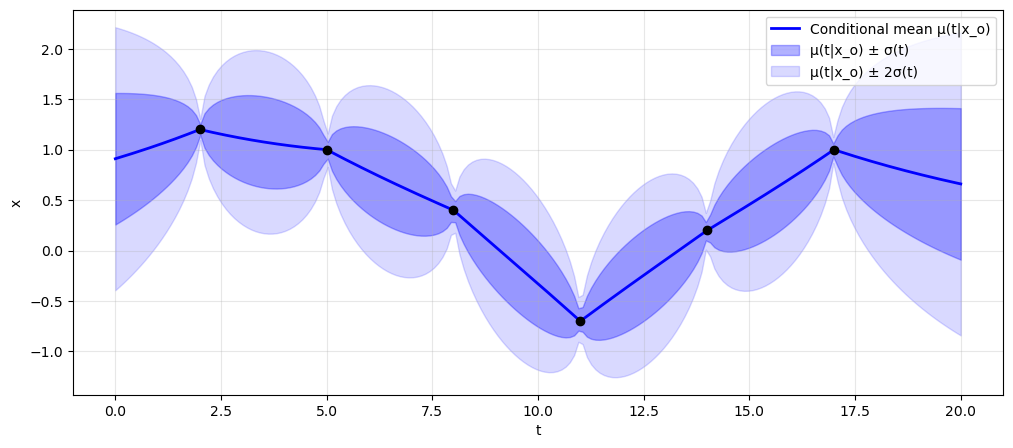

In [57]:
t_train, x_train = np.array([2, 5, 8, 11, 14, 17]).reshape(-1,1), np.array([1.2, 1, 0.4, -0.7, 0.2, 1]).reshape(-1,1)

kernel = Matern(length_scale=-1/np.log(0.8), length_scale_bounds=(1e-3, 1e2), nu = 0.5)
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(t_train, x_train)
gaussian_process.kernel_

t = np.linspace(0, 20, 200).reshape(-1, 1)  # New time points for prediction
mean_prediction, std_prediction = gaussian_process.predict(t, return_std=True)

# Create the plot
plt.figure(figsize=(12, 5))

# Plot mean function
plt.plot(t, mean_prediction, 'b-', linewidth=2, label='Conditional mean μ(t|x_o)')

# Plot confidence bands (mean ± 1 standard deviation)
plt.fill_between(
    t.ravel(),
    mean_prediction - 1 * std_prediction,
    mean_prediction + 1 * std_prediction,
    alpha=0.3,
    color='blue', label='μ(t|x_o) ± σ(t)'
)
plt.fill_between(
    t.ravel(),
    mean_prediction - 2 * std_prediction,
    mean_prediction + 2 * std_prediction,
    alpha=0.15,
    color='blue', label='μ(t|x_o) ± 2σ(t)'
)
plt.scatter(t_train, x_train, color='black', zorder=5)
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

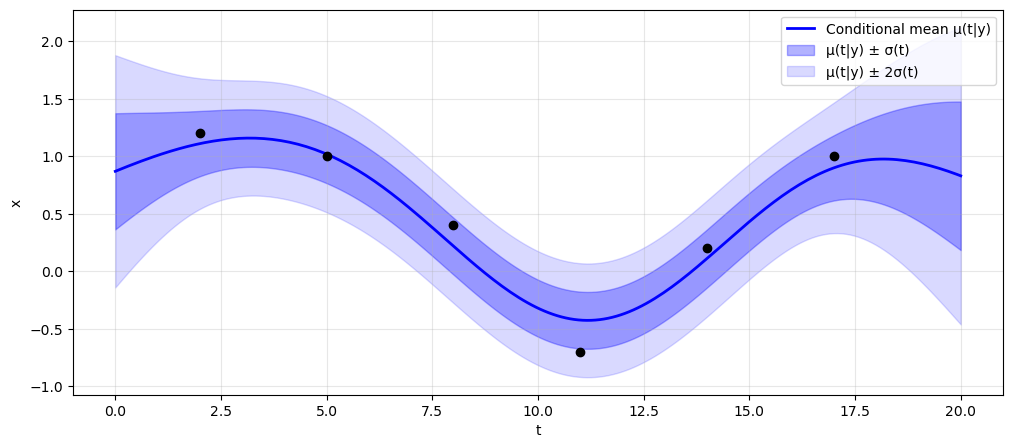

In [63]:
from sklearn.gaussian_process.kernels import RBF
kernel = RBF(1, length_scale_bounds=(1e-3, 1e2))

gaussian_process = GaussianProcessRegressor(kernel=kernel, alpha = 0.1, n_restarts_optimizer=9)
gaussian_process.fit(t_train, x_train)
gaussian_process.kernel_

t = np.linspace(0, 20, 200).reshape(-1, 1)  # New time points for prediction
mean_prediction, std_prediction = gaussian_process.predict(t, return_std=True)

# Create the plot
plt.figure(figsize=(12, 5))

# Plot mean function
plt.plot(t, mean_prediction, 'b-', linewidth=2, label='Conditional mean μ(t|y)')

# Plot confidence bands (mean ± 1 standard deviation)
plt.fill_between(
    t.ravel(),
    mean_prediction - 1 * std_prediction,
    mean_prediction + 1 * std_prediction,
    alpha=0.3,
    color='blue', label='μ(t|y) ± σ(t)'
)
plt.fill_between(
    t.ravel(),
    mean_prediction - 2 * std_prediction,
    mean_prediction + 2 * std_prediction,
    alpha=0.15,
    color='blue', label='μ(t|y) ± 2σ(t)'
)
plt.scatter(t_train, x_train, color='black', zorder=5)
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()